## Import initial libraries

In [1]:
import nltk
# nltk.download('punkt') # first-time use only
# nltk.download('wordnet') # first-time use only

import spacy


import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## Read file

In [2]:
with open('file.txt', 'r') as f:
    file = f.read()
    fi = file.lower()
    

## Split file into sentences and split into words

In [3]:
sentence = nltk.sent_tokenize(file)
sent_tokens = nltk.sent_tokenize(fi)# converts to list of sentences 
word_tokens = nltk.word_tokenize(fi)# converts to list of words

## Remove stopwords and Lemmatize

In [4]:
nlp = spacy.load("en_core_web_md", disable=["tagger", "ner"])

In [5]:
def text_preprocessing(sentence):
    #do some cleaning
    sentence  = nlp(sentence)
    clean_text = []
    for word in sentence:
        if not word.is_stop:
            if word.is_alpha:
                clean_text.append(word.lemma_)
    return clean_text

In [6]:
corpus = []
len_words = []
for sent in sent_tokens:
    new = text_preprocessing(sent)
    len_words.append(len(new))
    new_string = ' '.join(new)
    corpus.append(new_string)
    

In [7]:
len_sentence = [len(i.split()) for i in sent_tokens]

In [8]:
corpus

['public witness impeachment inquiry deliver testimony befit public servant',
 'ambassador william taylor deputy assistant secretary george kent wednesday uphold oath defend constitution deliver non partisan testimony detail president trump abuse power advance personal goal concurrently undermine vital interest',
 'taylor kent underscore trump decision freeze million dollar military aid crucial ukraine exchange politically motivate investigation serve vital interest serve russia',
 'taylor say write cable directly secretary state note folly freeze aid time hostility active russia watch closely gauge level american support ukrainian government russians say deposition love humiliation president zelensky hand americans taylor say',
 'hearing unfold diplomat explain security assistance equipment defend ukraine russian aggression deter',
 'freeze signal waver support ukraine decrease kyiv leverage negotiation russians conflict ukraine east',
 'ukrainians learn freeze taylor say ukraine mini

### Convert each sentence to a vector

In [9]:
# tf = TfidfVectorizer()
# out = tf.fit_transform(corpus)

tf = CountVectorizer()
out = tf.fit_transform(corpus)

In [10]:
import pandas as pd
tfs = pd.DataFrame(out.todense(), columns=tf.get_feature_names(), index=[sent for sent in sent_tokens])

### Calculate the term frequency of each work

In [11]:
col = tfs.columns
tfs['div'] = len_sentence
tfs_new = tfs[col].div(tfs['div'], axis=0)

In [12]:
tfs_new

,abuse,act,action,active,activity,advance,advantage,aggression,aid,ambassador,...,way,wednesday,whistleblower,white,will,william,witness,work,write,zelensky
the first two public witnesses of the impeachment inquiry delivered testimony befitting public servants.,0.000,0.000000,0.000000,0.0000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.071429,0.000000,0.0000,0.0000
ambassador william taylor and deputy assistant secretary george kent on wednesday upheld their oath to defend the constitution and delivered non-partisan testimony that detailed president trump’s abuse of power to advance his personal goals while concurrently undermining u.s. vital interests.,0.025,0.000000,0.000000,0.0000,0.000,0.025,0.000000,0.000000,0.000000,0.025000,...,0.000000,0.025,0.000000,0.000000,0.000000,0.025,0.000000,0.000000,0.0000,0.0000
"taylor and kent underscored that trump’s decision to freeze millions of dollars in u.s. military aid “crucial” to ukraine in exchange for politically motivated investigations didn’t serve u.s. vital interests, but did serve russia’s.",0.000,0.000000,0.000000,0.0000,0.000,0.000,0.000000,0.000000,0.029412,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.0000
"taylor said that he did something he’s never done before — he wrote a cable directly to the secretary of state in which he noted the “folly” in freezing aid “at a time when hostilities were still active” and when russia was “watching closely to gauge the level of american support for the ukrainian government.” “the russians, as i said at my deposition, would love to see the humiliation of president zelensky at the hands of the americans,” taylor said.",0.000,0.000000,0.000000,0.0125,0.000,0.000,0.000000,0.000000,0.012500,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0125,0.0125
"as the hearings unfolded, the diplomats explained that this security assistance is for equipment used to defend ukraine from russian aggression (and deter more of it).",0.000,0.000000,0.000000,0.0000,0.000,0.000,0.000000,0.038462,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.0000
"the freeze signaled wavering in u.s. support for ukraine, which decreased kyiv’s leverage in negotiations with the russians over the conflict in ukraine’s east.",0.000,0.000000,0.000000,0.0000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.0000
"when the ukrainians learned of the freeze, taylor said ukraine’s minister of defense was “desperate” to get the hold lifted, and taylor said back then that the delay in assistance could cost lives.",0.000,0.000000,0.000000,0.0000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.0000
"as taylor testified, the russians always look for vulnerabilities, and if they determined or suspected that u.s. support for ukraine is lessened they could easily have taken advantage.",0.000,0.000000,0.000000,0.0000,0.000,0.000,0.035714,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.0000
"trump’s freeze on aid not only sent a negative message to ukraine, but also a positive message to russia and president vladimir putin about his position of strength when it comes to russia’s ongoing, illegal activities in and against ukraine.",0.000,0.000000,0.000000,0.0000,0.025,0.000,0.000000,0.000000,0.025000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.0000
"but, despite knowing the stakes, trump prioritized his personal grievances: investigations into the bidens and a conspiracy theory blaming ukraine for the 2016 u.s. election hacks, which the witnesses said had no merit.",0.000,0.000000,0.000000,0.0000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00

### Find the cosine similarity of each sentenc as well and rank them

In [13]:
sentence_similarity_martix = cosine_similarity(tfs_new)

In [14]:
sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)

In [15]:
sentence_similarity_graph

In [16]:
 scores = nx.pagerank(sentence_similarity_graph)

In [17]:
scores

{0: 0.03780545276645393,
 1: 0.04592681578814821,
 2: 0.060277489302675125,
 3: 0.047150208045643106,
 4: 0.03490207937954054,
 5: 0.04271953480018282,
 6: 0.0505545537692476,
 7: 0.04436299797793569,
 8: 0.04944318154323668,
 9: 0.0521853262453582,
 10: 0.056835825797238115,
 11: 0.052369711286111016,
 12: 0.05387601148651777,
 13: 0.05228726576312982,
 14: 0.05131722122735133,
 15: 0.0441659318711742,
 16: 0.044813825387619036,
 17: 0.04219041208062202,
 18: 0.04332915851980449,
 19: 0.05174985412880246,
 20: 0.041737142833207896}

### Map sentence with score

In [18]:
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentence)), reverse=True)    
ranked_sentence

[(0.060277489302675125,
  'Taylor and Kent underscored that Trump’s decision to freeze millions of dollars in U.S. military aid “crucial” to Ukraine in exchange for politically motivated investigations didn’t serve U.S. vital interests, but did serve Russia’s.'),
 (0.056835825797238115,
  'Taylor shared for the first time that a member of his staff was told by Ambassador Gordon Sondland that “Trump was more concerned about investigations of Biden” than Ukraine.'),
 (0.05387601148651777,
  'Taylor and Kent acted like the dedicated public servants that they are, while Republican members of Congress acted like Trump’s publicists.'),
 (0.052369711286111016,
  'Translation: Trump cared more about his political needs than about protecting Ukraine and deterring Russia.'),
 (0.05228726576312982,
  'Plus, both witnesses testified that Trump and his inner circle were not conducting government business as usual — they called it an “irregular channel.” Kent testified that efforts to “gin up politi

In [19]:
top_n = 5
summarize_text = []

for i in range(top_n):
      summarize_text.append(ranked_sentence[i][1])

### View Summary

In [20]:
new_summary = ' '.join(summarize_text) 

In [21]:
new_summary

'Taylor and Kent underscored that Trump’s decision to freeze millions of dollars in U.S. military aid “crucial” to Ukraine in exchange for politically motivated investigations didn’t serve U.S. vital interests, but did serve Russia’s. Taylor shared for the first time that a member of his staff was told by Ambassador Gordon Sondland that “Trump was more concerned about investigations of Biden” than Ukraine. Taylor and Kent acted like the dedicated public servants that they are, while Republican members of Congress acted like Trump’s publicists. Translation: Trump cared more about his political needs than about protecting Ukraine and deterring Russia. Plus, both witnesses testified that Trump and his inner circle were not conducting government business as usual — they called it an “irregular channel.” Kent testified that efforts to “gin up politically motivated investigations” were “infecting” U.S. policy toward Ukraine.'

# An attempt to replicate what networkxx is doing

In [22]:
df = pd.DataFrame(sentence_similarity_martix)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,0.111979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071067,...,0.000000,0.213201,0.060302,0.181818,0.000000,0.000000,0.048280,0.000000,0.177394,0.365636
1,0.111979,1.000000,0.193601,0.114614,0.053606,0.000000,0.081044,0.051503,0.071474,0.087538,...,0.061898,0.131306,0.074278,0.055989,0.047946,0.090075,0.118940,0.143839,0.109254,0.180151
2,0.000000,0.193601,1.000000,0.160872,0.060193,0.161515,0.182006,0.115663,0.280900,0.147442,...,0.208514,0.147442,0.250217,0.125739,0.161515,0.151717,0.133556,0.107676,0.122679,0.151717
3,0.000000,0.114614,0.160872,1.000000,0.000000,0.119523,0.370389,0.171184,0.148478,0.109109,...,0.051434,0.072739,0.030861,0.232621,0.000000,0.037424,0.098833,0.159364,0.060523,0.000000
4,0.000000,0.053606,0.060193,0.000000,1.000000,0.149071,0.125988,0.080064,0.111111,0.068041,...,0.192450,0.000000,0.057735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.161515,0.119523,0.149071,1.000000,0.169031,0.286446,0.248452,0.121716,...,0.172133,0.000000,0.103280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.081044,0.182006,0.370389,0.125988,0.169031,1.000000,0.181568,0.125988,0.154303,...,0.072739,0.102869,0.043644,0.263181,0.000000,0.000000,0.069886,0.112687,0.085592,0.000000
7,0.000000,0.051503,0.115663,0.171184,0.080064,0.286446,0.181568,1.000000,0.106752,0.065372,...,0.092450,0.065372,0.166410,0.083624,0.000000,0.000000,0.000000,0.143223,0.054393,0.000000
8,0.000000,0.071474,0.280900,0.148478,0.111111,0.248452,0.125988,0.106752,1.000000,0.136083,...,0.320750,0.045361,0.115470,0.000000,0.049690,0.046676,0.030817,0.099381,0.037743,0.093352
9,0.071067,0.087538,0.147442,0.109109,0.068041,0.121716,0.154303,0.065372,0.136083,1.000000,...,0.157135,0.055556,0.188562,0.142134,0.182574,0.114332,0.150970,0.060858,0.184900,0.057166


In [24]:
new = df.copy()

new['sum'] = new.sum(axis=1)

new = new.reset_index()

new.sort_values('sum', ascending=False)

,index,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,sum
2,2,0.000000,0.193601,1.000000,0.160872,0.060193,0.161515,0.182006,0.115663,0.280900,...,0.147442,0.250217,0.125739,0.161515,0.151717,0.133556,0.107676,0.122679,0.151717,4.085875
10,10,0.000000,0.148888,0.222911,0.123718,0.077152,0.138013,0.174964,0.148250,0.154303,...,0.188982,0.160357,0.161165,0.207020,0.129641,0.128388,0.069007,0.157243,0.064820,3.821976
12,12,0.213201,0.131306,0.147442,0.072739,0.000000,0.000000,0.102869,0.065372,0.045361,...,1.000000,0.094281,0.142134,0.060858,0.114332,0.075485,0.060858,0.832050,0.114332,3.595727
13,13,0.060302,0.074278,0.250217,0.030861,0.057735,0.103280,0.043644,0.166410,0.115470,...,0.094281,1.000000,0.060302,0.206559,0.194029,0.224179,0.154919,0.078446,0.048507,3.445672
9,9,0.071067,0.087538,0.147442,0.109109,0.068041,0.121716,0.154303,0.065372,0.136083,...,0.055556,0.188562,0.142134,0.182574,0.114332,0.150970,0.060858,0.184900,0.057166,3.443841
11,11,0.000000,0.061898,0.208514,0.051434,0.192450,0.172133,0.072739,0.092450,0.320750,...,0.078567,0.133333,0.100504,0.086066,0.161690,0.053376,0.172133,0.065372,0.080845,3.439566
19,19,0.177394,0.109254,0.122679,0.060523,0.000000,0.000000,0.085592,0.054393,0.037743,...,0.832050,0.078446,0.118262,0.050637,0.095130,0.062807,0.050637,1.000000,0.095130,3.438193
14,14,0.181818,0.055989,0.125739,0.232621,0.000000,0.000000,0.263181,0.083624,0.000000,...,0.142134,0.060302,1.000000,0.155700,0.146254,0.096561,0.155700,0.118262,0.146254,3.367942
6,6,0.000000,0.081044,0.182006,0.370389,0.125988,0.169031,1.000000,0.181568,0.125988,...,0.102869,0.043644,0.263181,0.000000,0.000000,0.069886,0.112687,0.085592,0.000000,3.315879
8,8,0.000000,0.071474,0.280900,0.148478,0.111111,0.248452,0.125988,0.106752,1.000000,...,0.045361,0.115470,0.000000,0.049690,0.046676,0.030817,0.099381,0.037743,0.093352,3.222782


### visualize cosine similarity

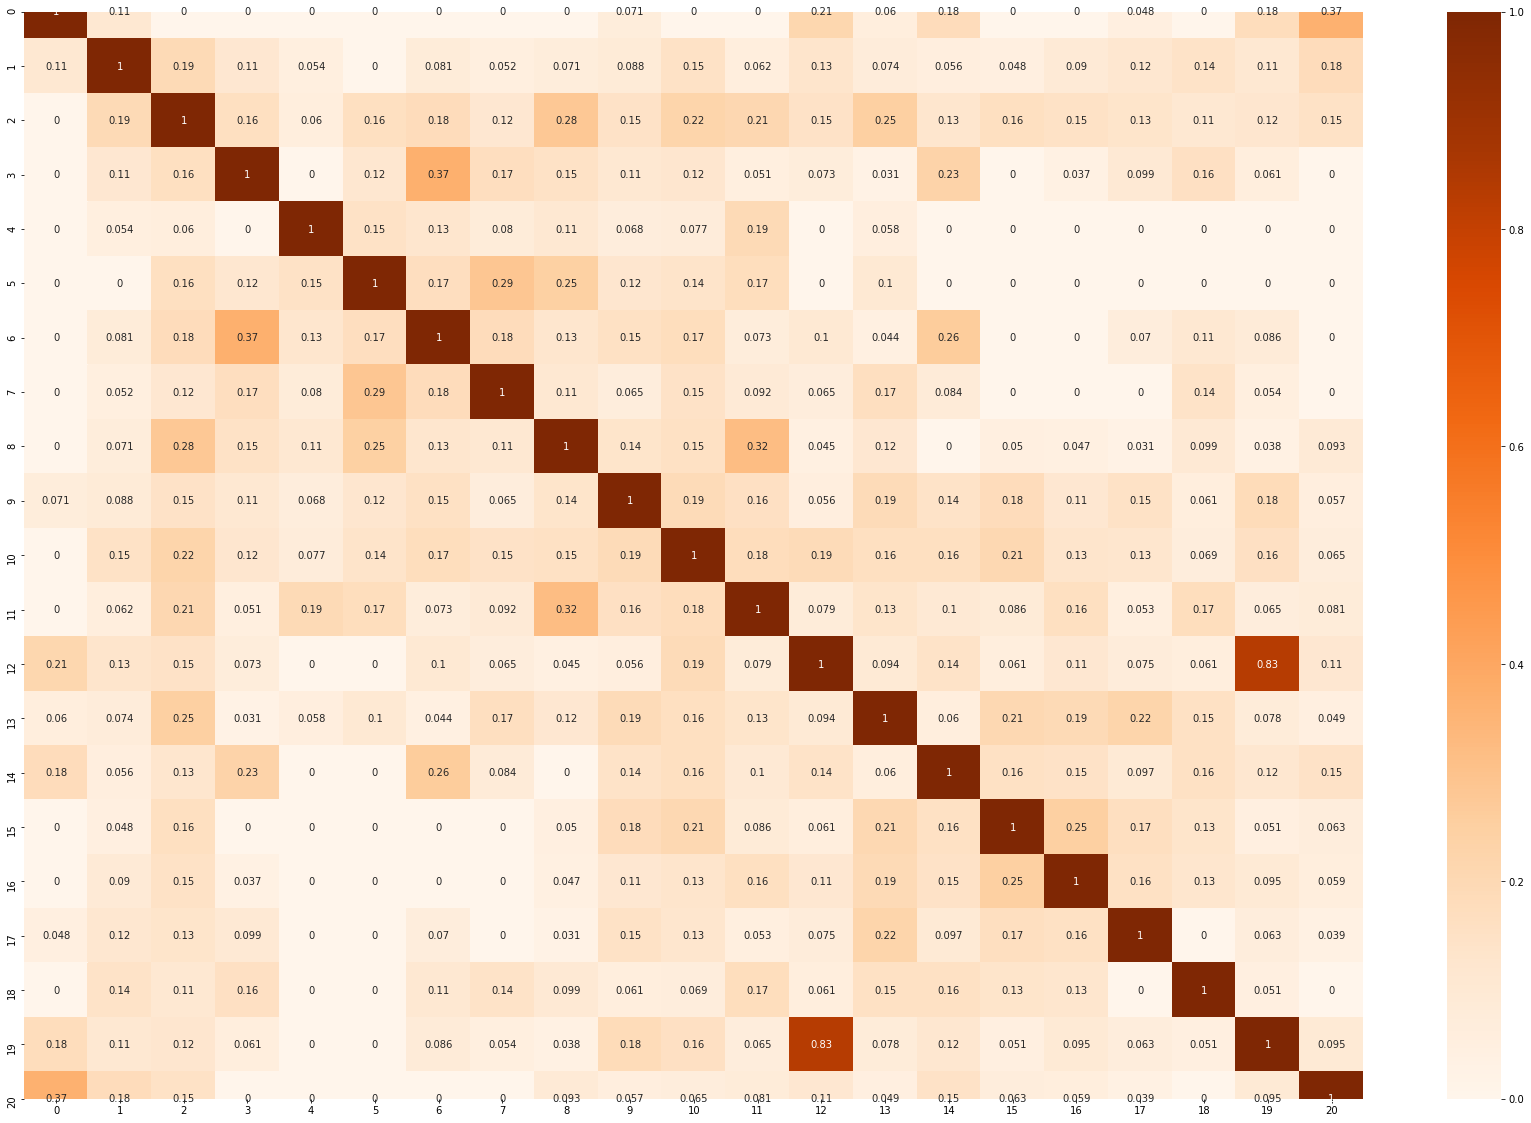

In [25]:



import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt


plt.figure(figsize=(30,20))
sns.heatmap(df, annot=True, cmap='Oranges')